# Exploración y Recolección de Datos con Joins en Fórmula 1

Este notebook está diseñado para una clase práctica en la que se exploran y recolectan datos mediante la unión (_joins_) de múltiples datasets de Fórmula 1. El objetivo es analizar conjuntamente información procedente de diferentes orígenes para responder preguntas de negocio y obtener insights sobre la historia de la F1.

## Objetivos de la Clase

1. Comprender el uso de joins para combinar tablas utilizando claves comunes (por ejemplo, `raceId` y `driverId`).
2. Explorar la integración de datos provenientes de archivos distintos y su impacto en la información resultante.
3. Responder a preguntas de negocio como:
   - ¿Cuántos pilotos han participado en la F1?
   - ¿Cuál es el circuito que ha sido más utilizado?
   - ¿Qué piloto ha ganado más carreras?
   - ¿Qué piloto ha acumulado más puntos durante su carrera?
4. Interpretar gráficamente resultados y tendencias a lo largo del tiempo.

La idea es que, mediante el uso de operaciones join, los estudiantes unan y analicen datos de varias fuentes (por ejemplo, `races.csv`, `results.csv` y `drivers.csv`) para elaborar un análisis exploratorio completo.

In [ ]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/f1stasts_1.zip
!unzip f1stasts_1.zip

--2025-04-10 21:53:03--  https://github.com/javierherrera1996/lecture_analytics/raw/main/f1stasts_1.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/f1stasts_1.zip [following]
--2025-04-10 21:53:03--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/f1stasts_1.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6183969 (5.9M) [application/zip]
Saving to: ‘f1stasts_1.zip’

f1stasts_1.zip      100%[===================>]   5.90M  --.-KB/s    in 0.09s   

2025-04-10 21:53:03 (68.5 MB/s) - ‘f1stasts_1.zip’ saved [6183969/6183969]



In [ ]:
import pandas as pd

# Load the datasets
races_df = pd.read_csv('races.csv')
results_df = pd.read_csv('results.csv')
drivers_df = pd.read_csv('drivers.csv')

# Create df_resultados by merging results_df and drivers_df
df_resultados = pd.merge(results_df, drivers_df, on='driverId', how='inner') # This line was missing and is added now

# Merge df_resultados with races_df to create df_completo
df_completo = pd.merge(df_resultados, races_df, on='raceId', how='inner')

# Now you can use df_completo
unique_constructor_ids = df_completo['constructorId'].unique()

# Print the unique constructor IDs
print(unique_constructor_ids)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  21  20  22  24  25  26  27  29  28  30  31  32  33  34  35  36  37
  38  40  39  41  42  44  45  46  47  23  48  49  50  51  52  53  54  55
  56  57  58  59 204  60  61  62 182  63  64  65  66  67  68  69  70  71
  72  73  74 202  75  76 203  80  77  78  79  81  82  83  84 180 200 199
 201  85 187  86 198 196 191 167 197 189 183 194 190  89 170 195 184 176
 172 193  90 181 188 192  91 185 186  93  94  92  95  96  97 177 179 173
  98  99 175  87 100 174 178 101 102 103 104 105 106 171 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 169 123 168 124 125 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 152 151 126 153 154 155 156 157 158 159 160 162 161
 163 205 164 166 208 206 207 209 210 211 213 214]


## 1. Carga y Exploración de los Datos

En esta sección se cargan y revisan brevemente los datasets principales:

- **races.csv:** Contiene detalles de cada carrera (año, circuito, fecha, etc.).
- **results.csv:** Registra los resultados de cada carrera (posición, puntos, vueltas, etc.).
- **drivers.csv:** Información sobre cada piloto (nombre, nacionalidad, fecha de nacimiento, etc.).

Asegúrate de tener estos archivos en tu entorno de trabajo.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
import pandas as pd

# Load the datasets
races_df = pd.read_csv('races.csv')
results_df = pd.read_csv('results.csv')
drivers_df = pd.read_csv('drivers.csv')

# Briefly review the datasets
races_df.head()  # Display the first few rows of races_df
results_df.info()  # Display information about results_df
drivers_df.describe()  # Display descriptive statistics of drivers_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26080 non-null  int64  
 1   raceId           26080 non-null  int64  
 2   driverId         26080 non-null  int64  
 3   constructorId    26080 non-null  int64  
 4   number           26080 non-null  object 
 5   grid             26080 non-null  int64  
 6   position         26080 non-null  object 
 7   positionText     26080 non-null  object 
 8   positionOrder    26080 non-null  int64  
 9   points           26080 non-null  float64
 10  laps             26080 non-null  int64  
 11  time             26080 non-null  object 
 12  milliseconds     26080 non-null  object 
 13  fastestLap       26080 non-null  object 
 14  rank             26080 non-null  object 
 15  fastestLapTime   26080 non-null  object 
 16  fastestLapSpeed  26080 non-null  object 
 17  statusId    

,driverId
count,857.000000
mean,429.057176
std,247.632402
min,1.000000
25%,215.000000
50%,429.000000
75%,643.000000
max,858.000000


## 2. Análisis Preliminar y Preparación de los Datos

Antes de realizar las uniones, es importante revisar las columnas clave de cada DataFrame:

- En **races_df** utilizaremos `raceId` para identificar la carrera.
- En **results_df** también se emplea `raceId` y `driverId` para enlazar resultados y pilotos.
- En **drivers_df** `driverId` es la clave para identificar a cada piloto.

Realiza un análisis exploratorio básico (conteos, tipos de dato, detección de nulos) para asegurarte de la calidad de la información.

In [ ]:
# Check data types and missing values
print("Races DataFrame:")
print(races_df.info())
print("\nResults DataFrame:")
print(results_df.info())
print("\nDrivers DataFrame:")
print(drivers_df.info())

# Check unique values in key columns
print("\nUnique raceId in races_df:", races_df['raceId'].nunique())
print("Unique raceId in results_df:", results_df['raceId'].nunique())
print("Unique driverId in results_df:", results_df['driverId'].nunique())
print("Unique driverId in drivers_df:", drivers_df['driverId'].nunique())

# Check for missing values in key columns
print("\nMissing values in races_df['raceId']:", races_df['raceId'].isnull().sum())
print("Missing values in results_df['raceId']:", results_df['raceId'].isnull().sum())
print("Missing values in results_df['driverId']:", results_df['driverId'].isnull().sum())
print("Missing values in drivers_df['driverId']:", drivers_df['driverId'].isnull().sum())

Races DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1101 non-null   int64 
 1   year         1101 non-null   int64 
 2   round        1101 non-null   int64 
 3   circuitId    1101 non-null   int64 
 4   name         1101 non-null   object
 5   date         1101 non-null   object
 6   time         1101 non-null   object
 7   url          1101 non-null   object
 8   fp1_date     1101 non-null   object
 9   fp1_time     1101 non-null   object
 10  fp2_date     1101 non-null   object
 11  fp2_time     1101 non-null   object
 12  fp3_date     1101 non-null   object
 13  fp3_time     1101 non-null   object
 14  quali_date   1101 non-null   object
 15  quali_time   1101 non-null   object
 16  sprint_date  1101 non-null   object
 17  sprint_time  1101 non-null   object
dtypes: int64(4), object(14)
memory usage: 155.0+ KB
Non

## 3. Integración de Datos mediante Joins

El objetivo es unir la información de las distintas tablas para poder responder a preguntas de negocio. En este ejercicio central, se utilizarán joins para obtener insights combinando datos de carreras, resultados y pilotos.

### 3.1 Unir `results_df` y `drivers_df`

Para analizar la participación y resultados de cada piloto, realizamos un merge entre `results_df` y `drivers_df` utilizando la clave `driverId`.

**Pregunta clave:** ¿Cuántos pilotos distintos han participado en la F1?

Utiliza el DataFrame resultante para explorar esta pregunta.

In [ ]:
df_resultados = pd.merge(results_df, drivers_df, on='driverId', how='inner')

In [ ]:
num_drivers = df_resultados['driverId'].nunique()
print(f"Number of distinct drivers in F1: {num_drivers}")

Number of distinct drivers in F1: 857


### 3.2. Unir `df_resultados` con `races_df`

Ahora, para relacionar los resultados con cada carrera, se efectúa la unión entre el DataFrame obtenido (`df_resultados`) y `races_df` a través de la clave `raceId`.

**Pregunta clave:** ¿Qué información adicional sobre cada carrera (fecha, circuito, etc.) se puede incorporar para enriquecer el análisis?

Explora y analiza cómo afecta esta integración en el conjunto de datos final.

In [ ]:
df_completo = pd.merge(df_resultados, races_df, on='raceId', how='inner')

## 4. Análisis Conjunto y Ejercicios Interactivos

Con el DataFrame combinado (`df_completo`) podremos responder a varias preguntas de negocio y realizar análisis conjuntos. A continuación se proponen algunos ejercicios:

### Ejercicio 1: Identificar el Circuito Más Utilizado

Utiliza `races_df` y la información del DataFrame combinado para determinar cuál es el circuito (identificado con `circuitId` o el nombre del circuito, si se encuentra) que ha sido sede de la mayor cantidad de carreras.

**Sugerencia:** Usa la función `value_counts()` y discute el resultado con los estudiantes.

In [ ]:
# Assuming 'circuitId' is the column representing the circuit in races_df
most_used_circuit = races_df['circuitId'].value_counts().idxmax()

# Print the result
print(f"The most used circuit is: {most_used_circuit}")

# If you want to find the circuit name instead of circuitId:
# (Assuming 'name' column in races_df contains circuit names)
circuit_name = races_df.loc[races_df['circuitId'] == most_used_circuit, 'name'].iloc[0]
print(f"The most used circuit name is: {circuit_name}")

The most used circuit is: 14
The most used circuit name is: Italian Grand Prix


### Ejercicio 2: Piloto con Más Victorias

Filtra el DataFrame combinado para quedarte con aquellos registros donde la posición final (`position`) sea 1, lo que indica una victoria. Luego, agrupa por piloto para determinar quién ha ganado más carreras.

**Pregunta para los estudiantes:** _¿Qué piloto se destaca por su número de victorias y cómo se relaciona este dato con otros indicadores de rendimiento?_

In [ ]:
# Filter for wins (position == 1)
wins_df = df_completo[df_completo['positionOrder'] == 1]

# Group by driver and count wins
driver_wins = wins_df.groupby('driverId')['raceId'].count().reset_index()

# Rename columns for clarity
driver_wins.rename(columns={'raceId': 'win_count'}, inplace=True)

# Sort by win count in descending order
driver_wins = driver_wins.sort_values(by=['win_count'], ascending=False)

# Display the driver with the most wins
most_wins_driver = driver_wins.iloc[0]['driverId']
print(f"The driver with the most wins is: {most_wins_driver}")

The driver with the most wins is: 1


### Ejercicio 3: Piloto con Más Puntos

Agrupa el DataFrame combinado para sumar el total de puntos (`points`) obtenidos por cada piloto a lo largo de su carrera.

**Pregunta para los estudiantes:** _¿Existe correlación entre el número de victorias y la suma total de puntos? ¿Qué puede influir en esta relación?_

In [ ]:
# Group by driverId and sum points
driver_points = df_completo.groupby('driverId')['points'].sum().reset_index()

# Rename the 'points' column to 'total_points' for clarity
driver_points.rename(columns={'points': 'total_points'}, inplace=True)

# Sort by total_points in descending order to see the top performers
driver_points = driver_points.sort_values(by=['total_points'], ascending=False)

# Display the DataFrame to see the results
driver_points.head()

,driverId,total_points
0,1,4540.5
19,20,3098.0
828,830,2275.5
3,4,2203.0
7,8,1873.0


In [ ]:
# Merge driver_wins and driver_points DataFrames
driver_stats = pd.merge(driver_wins, driver_points, on='driverId', how='inner')

# Calculate the correlation between win_count and total_points
correlation = driver_stats['win_count'].corr(driver_stats['total_points'])

print(f"Correlation between win count and total points: {correlation}")

Correlation between win count and total points: 0.7667635549112088


**R=** Sí existe una correlación entre el número de victorias y la suma total de puntos ya que el índice de correlación es de 0,76. Además por simple lógica, debería tener entido que a mayor cantidad de vicotrias, mayor cantidad de puntos.

### Ejercicio 4: Distribución de Nacionalidades de los Pilotos

Analiza la columna `nationality` presente en `drivers_df` para determinar qué nacionalidades están mejor representadas en la F1. Realiza un gráfico de pastel para visualizar la distribución de pilotos por país.

**Debate:** ¿Qué factores históricos o deportivos crees que puedan explicar esta distribución?

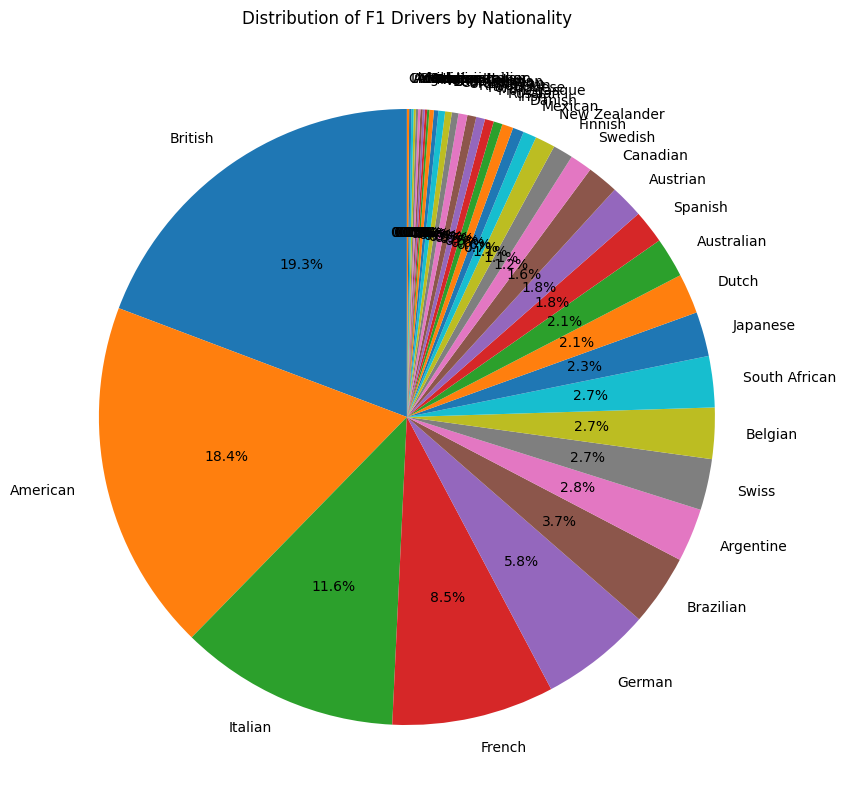

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each nationality
nationality_counts = drivers_df['nationality'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 10))  # Adjust figure size if needed
plt.pie(nationality_counts, labels=nationality_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of F1 Drivers by Nationality')
plt.show()

### Ejercicio 5: Evolución del Número de Carreras por Año

Genera un gráfico de barras que muestre cómo ha evolucionado el número de carreras a lo largo de los años, utilizando la información de `races_df`.

**Pregunta para los estudiantes:** _¿Qué eventos o cambios en la industria (por ejemplo, crisis, cambios en el reglamento) podrían explicar las variaciones observadas a lo largo de la historia?_

Este ejercicio ayudará a vincular el análisis de datos con contextos históricos y comerciales.

<function matplotlib.pyplot.show(close=None, block=None)>

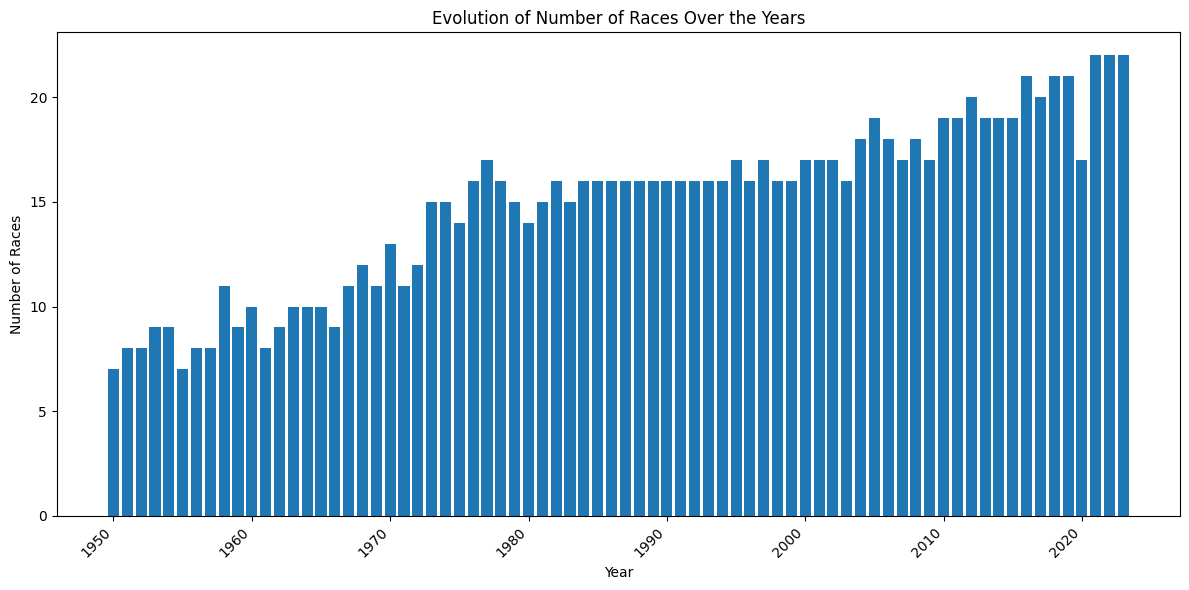

In [ ]:
import matplotlib.pyplot as plt

# Group by year and count races
races_per_year = races_df.groupby('year')['raceId'].count().reset_index()

# Rename columns for clarity
races_per_year.rename(columns={'raceId': 'race_count'}, inplace=True)

# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.bar(races_per_year['year'], races_per_year['race_count'])
plt.xlabel('Year')
plt.ylabel('Number of Races')
plt.title('Evolution of Number of Races Over the Years')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show

**R=** Algunos eventos que pudieron afectar la gráfica pudieron ser: La postguerra de la segunda guerra mundial, la guerra fría, la crisis de petróleo de 1970 y la pandemia del Covid19

## 5. Preguntas para el Análisis Conjunto y Debate en Clase

Para concluir la actividad, propón a los estudiantes debatir y responder a las siguientes preguntas:

1. **Integración y Calidad de Datos:** ¿Qué inconvenientes pueden surgir al unir tablas que tienen registros incompletos o duplicados? ¿Cómo solucionarlo?
2. **Estrategias de Join:** ¿En qué casos es más adecuado usar un `inner join` y cuándo un `outer join` para evitar perder información relevante?
3. **Insights Negocio:** Basándose en los resultados obtenidos (pilotos con más victorias/puntos, circuitos más usados, etc.), ¿qué estrategias de negocio o insights se podrían extraer para equipos o patrocinadores en la F1?
4. **Análisis Temporal:** ¿Qué relación existe entre los cambios en el número de carreras por año y otros indicadores (como el número de pilotos, eventos destacados, etc.)?

Estas preguntas tienen el objetivo de invitar a un análisis integral de los datos, combinando la técnica de joins con la interpretación y contextualización de los resultados.

**R=**

**1)** Algunos inconvenientes que pueden surgir al unir tablas que tienen registros incompletos o duplicados es que se puede perder información, quedar con información duplicada y directamente puede quedar con errores. Para solucionarlo, se puede hacer filtración de los datos antes de empezar el procedimiento, usar el join type adecuado, usar validación de datos o usar transformación de datos.

**2)**El inner join es más para casos de dejar datos en común entre tablas o datos, es decir, hacer una especie de filtración. El outer join, sirve más para hacer uniones de datos y en otras palabras, agrupar.

**3)** Para los equipos, algunas estrategias podrían ser:  identificar a los pilotos con mayor potencial basándose en su historial de victorias, puntos acumulados y otros indicadores de rendimiento, utilizar los datos de rendimiento de los coches en diferentes circuitos para identificar áreas de mejora y optimizar el diseño de sus vehículos y analizar los datos históricos de las carreras para identificar patrones y tendencias que les permitan tomar decisiones estratégicas durante las competiciones.

**Para los patrocinadores:**

**Selección de equipos:** Los patrocinadores pueden utilizar los datos de rendimiento de los equipos para identificar a aquellos que tienen mayor probabilidad de éxito y que les proporcionarán un mayor retorno de inversión.

**Selección de pilotos:** Los patrocinadores también pueden utilizar los datos de rendimiento de los pilotos para identificar a aquellos que tienen mayor popularidad y que les proporcionarán una mayor visibilidad de marca.

**Activación de patrocinios:** Los patrocinadores pueden utilizar los datos de la audiencia de la F1 para identificar a su público objetivo y desarrollar estrategias de activación de patrocinios más efectivas.

**4)** La relación que existe entre los cambios en el número de carreras por año y otros indicadores (como el número de pilotos, eventos destacados, etc.) son:

**Aumento en el número de carreras:** Un aumento en el número de carreras por año podría llevar a un aumento en la demanda de pilotos, lo que a su vez podría incentivar a más personas a involucrarse en el deporte y aumentar el número total de pilotos.

**Disminución en el número de carreras:** Una disminución en el número de carreras podría reducir las oportunidades para los pilotos, lo que podría llevar a una disminución en el número de pilotos activos en la F1.

**Popularidad del deporte:** Un aumento en el número de carreras podría contribuir a la popularidad de la F1, al brindar más oportunidades para que los aficionados sigan el deporte y se involucren con él.

**Ingresos:** Un aumento en el número de carreras podría generar mayores ingresos para la F1, a través de la venta de entradas, derechos de televisión y patrocinios.

**Costos:** Un aumento en el número de carreras también podría aumentar los costos para los equipos, debido a los viajes, la logística y el desgaste de los coches.

**Seguridad:** Un aumento en el número de carreras podría plantear desafíos para la seguridad, ya que los pilotos y los equipos tendrían menos tiempo para descansar y recuperarse entre carreras.



## 6. Conclusión

Este ejercicio integrador ha permitido utilizar joins para combinar distintos orígenes de datos y explorar de manera conjunta información esencial de la Fórmula 1. Se ha trabajado en:

- La identificación de claves y la integración de múltiples datasets.
- La generación de indicadores y visualizaciones útiles para responder preguntas de negocio.
- El análisis crítico y debate sobre la calidad de los datos y la metodología de integración.

Utiliza este notebook como una herramienta para profundizar en la recolección y exploración de datos, incentivando a los estudiantes a buscar conexiones entre la teoría de joins y su aplicación en casos reales.

**Información para presentación:**

**Situación:**
 La compañía Eagles, es una compañía de patrocinio polaca que lleva patrocinando eventos deportivos desde 1899. En esta ocasión la empresa busca invertir en un nuevo deporte para ellos que es la F1.

**Complicación:**
La marca no tiene suficiente información que le permita decidir a qué equipo apoyar en la competencia, por temas de costeos busca que sea uno de los equipos ubicados entre el puesto 3 a 5 según puntos obtenidos en la competencia y que sean equipos ubicados entre los que más participan en competencias ya que quieren tener bastante visualización.

**Pregunta:**
¿Qué equipos le recomendaría a la marca placa que patrocinara la marca polaca?

**Gráficos**

1)	Puntos obtenidos por equipos (Top 10)

2)	Nacionalidades mejor representadas de la competencia (Top 5)

3)	Equipos con mayor cantidad de carreras.


 información del top 10 de equipos con mayores puntos y sus nacionalidades

Gráfico 1	Nacionalidades de los equipos con mejores performances en la competencia

In [ ]:
import pandas as pd

# Assuming df_completo is already defined

# Group by constructorId and sum points
constructor_points = df_completo.groupby('constructorId')['points'].sum().reset_index()
constructor_points.rename(columns={'points': 'total_points'}, inplace=True)

# Sort by total_points and get top 10  <--- Change here
top_10_constructors = constructor_points.sort_values(by=['total_points'], ascending=False).head(10)

# Merge with constructors data to get nationalities
constructors_df = pd.read_csv('constructors.csv')  # Assuming you have constructors.csv
top_10_with_nationality = pd.merge(top_10_constructors, constructors_df[['constructorId', 'nationality']], on='constructorId', how='left')

# Display the results
print(top_10_with_nationality[['constructorId', 'nationality', 'total_points']])

   constructorId nationality  total_points
0              6     Italian      10298.27
1            131      German       7159.64
2              9    Austrian       6812.00
3              1     British       6240.50
4              3     British       3609.00
5              4      French       1777.00
6             10      Indian       1098.00
7             32     British        995.00
8             22     Italian        861.50
9             25     British        711.00


Gráfico 2 de las nacionalidades mayor representadas

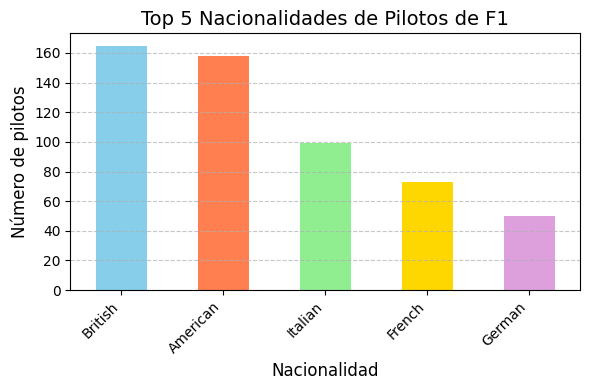

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Cuenta las ocurrencias de cada nacionalidad
nationality_counts = drivers_df['nationality'].value_counts()

# Selecciona las 5 nacionalidades principales
top_5_nationalities = nationality_counts.head(5)

# Crea un diagrama de barras con colores diferentes
plt.figure(figsize=(6, 4))
top_5_nationalities.plot(kind='bar', color=['skyblue', 'coral', 'lightgreen', 'gold', 'plum']) # Lista de colores
plt.xlabel('Nacionalidad', fontsize=12)
plt.ylabel('Número de pilotos', fontsize=12)
plt.title('Top 5 Nacionalidades de Pilotos de F1', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Gráfico 3	equipos con mayor cantidad de carreras

In [ ]:
import pandas as pd

# Suponiendo que df_completo ya está definido
# (resultado de la unión de results_df, drivers_df y races_df)

# Agrupa por constructorId y cuenta las carreras participadas
constructor_races = df_completo.groupby('constructorId')['raceId'].nunique().reset_index()
constructor_races.rename(columns={'raceId': 'races_participated'}, inplace=True)

# Ordena por carreras participadas y obtén los 10 principales
top_10_constructors = constructor_races.sort_values(by=['races_participated'], ascending=False).head(10)

# Une con los datos de los constructores para obtener los nombres
constructors_df = pd.read_csv('constructors.csv')  # Suponiendo que tienes constructors.csv
top_10_with_names = pd.merge(top_10_constructors, constructors_df[['constructorId', 'name']], on='constructorId', how='left')

# Muestra los resultados con constructorId y name
print(top_10_with_names[['constructorId', 'name', 'races_participated']])

   constructorId        name  races_participated
0              6     Ferrari                1066
1              1     McLaren                 895
2              3    Williams                 809
3             25     Tyrrell                 433
4              4     Renault                 403
5             15      Sauber                 395
6             32  Team Lotus                 395
7              9    Red Bull                 360
8             18     Minardi                 345
9             27      Ligier                 330
